# Problem Solutions 

unit is expressed in mm



## Problem 1 


Find, by the use of Figure 1, the direct kinematic transformations, $T^0_4$ for the robot stylus, and $T^0_5$ for the robot camera, as function of all joint angles.

In [27]:
from visual_kinematics.RobotSerial import *
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

from RobotController import *
import importlib

import RobotFunctions as RF
importlib.reload(RF) # **********

<module 'RobotFunctions' from 'c:\\Users\\justi\\OneDrive - Monash University\\Documents\\5. 34753 Robotics\\34753_Robotics_Group19\\RobotFunctions.py'>

In [28]:
# Symbols
theta1, theta2, theta3, theta4 = sp.symbols('theta1 theta2 theta3 theta4', real=True)
d1, d2, d3, d4 = sp.symbols('d1 d2 d3 d4', real=True)

# DH transforms
T01 = RF.make_DH_matrix(theta1,  d1,   0,        sp.pi/2)
T12 = RF.make_DH_matrix(theta2,   0,  d2,       0)
T23 = RF.make_DH_matrix(theta3,   0,  d3,       0)
T34 = RF.make_DH_matrix(theta4,   0,  d4,       0)

# Manual T45 (pure translation)
T45 = sp.Matrix([
    [1, 0, 0, -0.015],
    [0, 1, 0,  0.045],
    [0, 0, 1,  0.0  ],
    [0, 0, 0,  1    ],
])

In [29]:
T01_sym = sp.simplify(T01)
RF.print_matrix_aligned("T01 (symbolic)", T01_sym)

T12_sym = sp.simplify(T12)
RF.print_matrix_aligned("T12 (symbolic)", T12_sym)

T23_sym = sp.simplify(T23)
RF.print_matrix_aligned("T23 (symbolic)", T23_sym)

T34_sym = sp.simplify(T34)
RF.print_matrix_aligned("T34 (symbolic)", T34_sym)


T01 (symbolic) =
┌             │      │              │      ┐
│ cos(theta1) │    0 │  sin(theta1) │    0 │
│ sin(theta1) │    0 │ -cos(theta1) │    0 │
│           0 │ 1.00 │            0 │   d1 │
│           0 │    0 │            0 │ 1.00 │
└             │      │              │      ┘

T12 (symbolic) =
┌             │              │      │                ┐
│ cos(theta2) │ -sin(theta2) │    0 │ d2*cos(theta2) │
│ sin(theta2) │  cos(theta2) │    0 │ d2*sin(theta2) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T23 (symbolic) =
┌             │              │      │                ┐
│ cos(theta3) │ -sin(theta3) │    0 │ d3*cos(theta3) │
│ sin(theta3) │  cos(theta3) │    0 │ d3*sin(theta3) │
│           0 │            0 │ 1.00 │              0 │
│           0 │            0 │    0 │           1.00 │
└             │              │      │                ┘

T34 (symbolic) 

In [30]:
# Symbolic total transform
T04_sym = sp.simplify(T01 * T12 * T23 * T34)
T05_sym = sp.simplify(T01 * T12 * T23 * T34 * T45)

print("=== SYMBOLIC MATRICES ===")

RF.print_matrix_aligned("T04 (symbolic)", T04_sym)
RF.print_matrix_aligned("T05 (symbolic)", T05_sym)

=== SYMBOLIC MATRICES ===

T04 (symbolic) =
┌                                           │                                            │              │                                                                                           ┐
│ cos(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta2 + theta3 + theta4)*cos(theta1) │  sin(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*cos(theta1) │
│ sin(theta1)*cos(theta2 + theta3 + theta4) │ -sin(theta1)*sin(theta2 + theta3 + theta4) │ -cos(theta1) │ (d2*cos(theta2) + d3*cos(theta2 + theta3) + d4*cos(theta2 + theta3 + theta4))*sin(theta1) │
│             sin(theta2 + theta3 + theta4) │              cos(theta2 + theta3 + theta4) │            0 │          d1 + d2*sin(theta2) + d3*sin(theta2 + theta3) + d4*sin(theta2 + theta3 + theta4) │
│                                         0 │                                          0 │            0 │                                                           

## Problem 2 
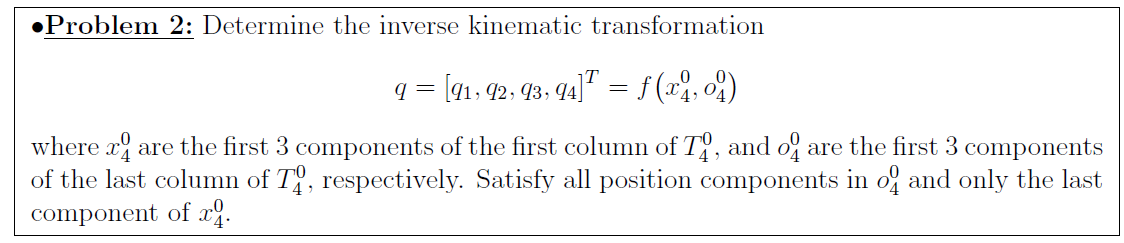

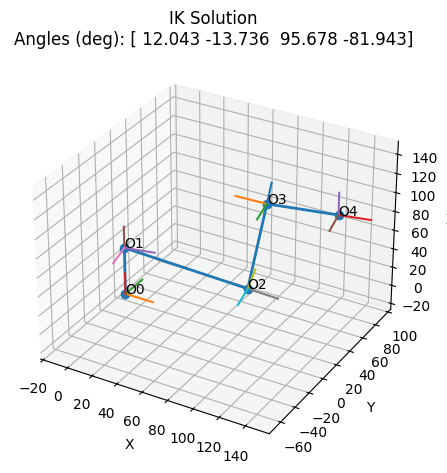

IK solution (rad): [ 0.21018259 -0.23973022  1.66990262 -1.4301724 ]
IK solution (deg): [ 12.04257514 -13.73552965  95.67837236 -81.94284271]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15


In [31]:
from RobotFunctions import solve_fk_ik_and_visualize

# [1] Robot geometry (mm)
d1 = 50.0
d2 = 93.0
d3 = 93.0
d4 = 50.0

# [2] Inputs (robot position, and orientation of x-axis of end effector)
pos4 = np.array([150.0, 32.0, 120.0], dtype=float)  # End-effector position (o4^0)
Rot4_X4_Z0 = 0.0                                    # z-component of x4-axis (r31 of R04)

# [3] Solve IK, verify with FK, and visualise
q, T04_fk, T04_target = solve_fk_ik_and_visualize(pos4, Rot4_X4_Z0, d1, d2, d3, d4, draw_axes=True)

# [4] Print results
print("IK solution (rad):", q)
print("IK solution (deg):", np.rad2deg(q))

p_fk = T04_fk[0:3, 3]
print("FK end-effector position (mm):", p_fk)
print("Target position (mm):         ", pos4)
print("Position error norm (mm):     ", np.linalg.norm(p_fk - pos4))

## Problem 3 
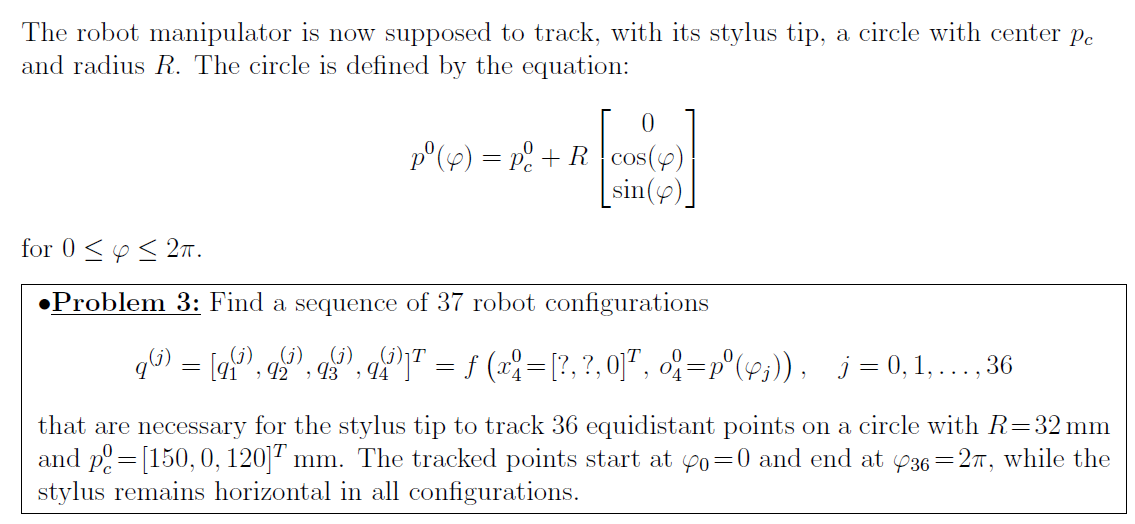

In [32]:
# ---------- Circle specification ----------
phi = np.linspace(0.0, 2*np.pi, 37)                   # 37 points (φ₀ ... φ₃₆)
p_c0 = np.array([150.0, 0.0, 120.0], dtype=float)     # circle centre in {0}
R = 32.0                                              # circle radius (mm)
Rot4_X4_Z0 = 0.0                                      # stylus horizontal (r31 = 0)

# ---------- Storage ----------
Q_rad, Q_deg, P_fk, P_trg, errs = [], [], [], [], []

# ---------- Compute for each waypoint ----------
for th in phi:
    # Circle point: p⁰(φ) = p_c⁰ + R·[0, cosφ, sinφ]^T
    p_target = p_c0 + R * np.array([0.0, np.cos(th), np.sin(th)], dtype=float)

    # Build full pose and solve IK
    T_target = RF.build_pose_from_inputs(p_target, Rot4_X4_Z0)
    q = RF.inverse_ik_from_pose(T_target, d1, d2, d3, d4)

    # Forward check
    T_fk = RF.fk_T04(q, d1, d2, d3, d4)
    p_fk = T_fk[:3, 3]
    err = np.linalg.norm(p_fk - p_target)

    # Store
    Q_rad.append(q)
    Q_deg.append(np.rad2deg(q))
    P_fk.append(p_fk)
    P_trg.append(p_target)
    errs.append(err)

Q_rad, Q_deg, P_fk, P_trg, errs = (
    np.vstack(Q_rad),
    np.vstack(Q_deg),
    np.vstack(P_fk),
    np.vstack(P_trg),
    np.array(errs),
)

# ---------- Print verification for first waypoint ----------
print("IK solution (rad):", Q_rad[0])
print("IK solution (deg):", Q_deg[0])
print("FK end-effector position (mm):", P_fk[0])
print("Target position (mm):         ", P_trg[0])
print("Position error norm (mm):     ", errs[0])

print("\nGlobal checks over 37 points:")
print(f"Max |position error| (mm): {errs.max():.3e}")
print(f"Mean |position error| (mm): {errs.mean():.3e}")

IK solution (rad): [ 0.21018259 -0.23973022  1.66990262 -1.4301724 ]
IK solution (deg): [ 12.04257514 -13.73552965  95.67837236 -81.94284271]
FK end-effector position (mm): [150.  32. 120.]
Target position (mm):          [150.  32. 120.]
Position error norm (mm):      7.105427357601002e-15

Global checks over 37 points:
Max |position error| (mm): 3.256e-14
Mean |position error| (mm): 1.163e-14


In [33]:
# ---------- Print all joint configurations ----------
print("\nAll 37 joint configurations (degrees):\n")

for j in range(len(phi)):
    print(f"phi_{j:<2d} = {np.round(Q_deg[j], 8)}")


All 37 joint configurations (degrees):

phi_0  = [ 12.04257514 -13.73552965  95.67837236 -81.94284271]
phi_1  = [ 11.86484519 -10.34064627  93.06041825 -82.71977199]
phi_2  = [ 11.33569998  -7.06518863  90.46433962 -83.39915099]
phi_3  = [ 10.46748318  -3.99911591  87.9719723  -83.97285639]
phi_4  = [  9.28139181  -1.22807167  85.66770094 -84.43962928]
phi_5  = [  7.80815824   1.16795878  83.63561029 -84.80356906]
phi_6  = [  6.08852815   3.11679138  81.95555974 -85.07235112]
phi_7  = [  4.17315111   4.55696653  80.69823913 -85.25520566]
phi_8  = [  2.12154884   5.44113184  79.91966045 -85.3607923 ]
phi_9  = [  0.           5.73928384  79.65596513 -85.39524898]
phi_10 = [ -2.12154884   5.44113184  79.91966045 -85.3607923 ]
phi_11 = [ -4.17315111   4.55696653  80.69823913 -85.25520566]
phi_12 = [ -6.08852815   3.11679138  81.95555974 -85.07235112]
phi_13 = [ -7.80815824   1.16795878  83.63561029 -84.80356906]
phi_14 = [ -9.28139181  -1.22807167  85.66770094 -84.43962928]
phi_15 = [-10.

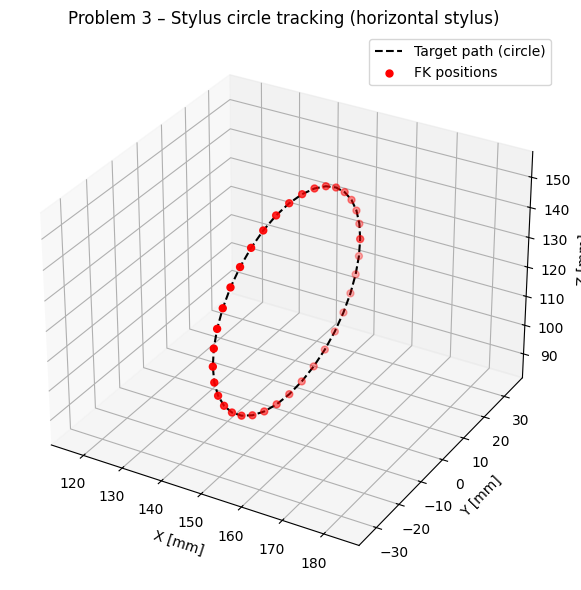


Visualizing waypoint j=0 (φ=0.00π)


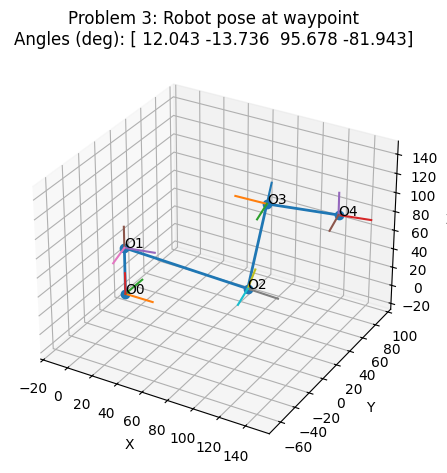

In [34]:
# ---------- Plot all 37 positions ----------
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

# Plot circle path
ax.plot(P_trg[:,0], P_trg[:,1], P_trg[:,2], 'k--', label="Target path (circle)")
# Plot FK-computed points
ax.scatter(P_fk[:,0], P_fk[:,1], P_fk[:,2], c='r', s=25, label="FK positions")

# Equal aspect
x, y, z = P_trg[:,0], P_trg[:,1], P_trg[:,2]
max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min())
mid = [x.mean(), y.mean(), z.mean()]
for axis, m in zip([ax.set_xlim, ax.set_ylim, ax.set_zlim], mid):
    axis(m - 0.6*max_range, m + 0.6*max_range)

ax.set_xlabel("X [mm]")
ax.set_ylabel("Y [mm]")
ax.set_zlabel("Z [mm]")
ax.set_title("Problem 3 – Stylus circle tracking (horizontal stylus)")
ax.legend()
plt.tight_layout()
plt.show()

# visualize any single configuration 
j = 0   # choose any index 0–36
from math import pi
DH_table = np.array([
    [0.0,  d1, 0.0,  np.pi/2],
    [0.0, 0.0,  d2,  0.0],
    [0.0, 0.0,  d3,  0.0],
    [0.0, 0.0,  d4,  0.0],
])
print(f"\nVisualizing waypoint j={j} (φ={phi[j]/pi:.2f}π)")
RF.plot_robot_4link(Q_rad[j], DH_table, title="Problem 3: Robot pose at waypoint")


# Problem 4

Determine the Jacobian of the manipulator for the robot end-effector and the Jacobian for the robot camera (as a function of the joint configuration q). Report the numerical results for the two Jacobians at $\varphi = 0$, $\varphi = \pi/2$, $\varphi = \pi$, and $\varphi = 3\pi/2$ along the path studies in Problem 3.

In [35]:
picks      = [0, 9, 18, 27, 36]          # indices along the 37-point path
phi_labels = [0, sp.pi/2, sp.pi, 3*sp.pi/2, 2*sp.pi]

for phi_lbl, idx in zip(phi_labels, picks):
    q_here = tuple(Q_rad[idx, :].tolist())
    J4, J5 = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

    print(f"φ = {phi_lbl}   (row {idx})")
    print("J_end-effector (6×4):")
    sp.pretty_print(J4)
    print("\nJ_camera (6×4):")
    sp.pretty_print(J5)
    print("\n" + "-"*60 + "\n")

φ = 0   (row 0)
J_end-effector (6×4):
⎡-32.0  -68.4595   -90.0555       0    ⎤
⎢                                      ⎥
⎢150.0  -14.6047   -19.2118       0    ⎥
⎢                                      ⎥
⎢  0     153.375    63.035      50.0   ⎥
⎢                                      ⎥
⎢  0    0.208638   0.208638   0.208638 ⎥
⎢                                      ⎥
⎢  0    -0.977993  -0.977993  -0.977993⎥
⎢                                      ⎥
⎣ 1.0       0          0          0    ⎦

J_camera (6×4):
⎡-31.9969  -68.5035   -90.0995   -0.0440097 ⎤
⎢                                           ⎥
⎢149.985   -14.6141   -19.2212   -0.00938873⎥
⎢                                           ⎥
⎢   0       153.36      63.02      49.985   ⎥
⎢                                           ⎥
⎢   0      0.208638   0.208638    0.208638  ⎥
⎢                                           ⎥
⎢   0      -0.977993  -0.977993   -0.977993 ⎥
⎢                                           ⎥
⎣  1.0         0          0       

# Problem 5

Compute the joint velocities $\dot{p}$ at $\varphi = \pi/2$, along the path from Problem 3, so that the stylus tip velocity is $v^0_4 = [0, -3, 0]mm/s$ and $\dot{x_4} = [?,?,0]$.

In [42]:
idx = 9                      # φ = π/2 along your 37-point path
q_here = tuple(Q_rad[idx, :].tolist())

J4, _ = RF.jacobian(q_here, (d1, d2, d3, d4), T45=T45)

# Desired end-effector twist v = [vx, vy, vz, wx, wy, wz]^T  (mm/s, rad/s)
v = sp.Matrix([0, -3, 0, 0, 0, 0])

# Minimum-norm solution: dq = J^+ v (right pseudoinverse for 6x4 J)
J4_pinv = J4.pinv()
joint_velocities = J4_pinv * v
# dq = (J4.T*J4).inv() * J4.T * v

# print the pseudoinverse
print("Pseudoinverse")
sp.pretty_print(J4_pinv.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))
# print the joint velocities
print("\nJoint Velocities")
sp.pretty_print(joint_velocities.applyfunc(lambda x: 0 if abs(sp.N(x)) < 1e-8 else sp.N(x, 6)))

Pseudoinverse
⎡     0       0.00666637      0       0      0      4.44425e-5⎤
⎢                                                             ⎥
⎢0.000873566      0       0.0108757   0  0.544001       0     ⎥
⎢                                                             ⎥
⎢-0.0117493       0       -0.0119591  0  -0.598579      0     ⎥
⎢                                                             ⎥
⎣ 0.0108795       0       0.00112915  0  -0.944044      0     ⎦

Joint Velocities
⎡-0.0199991⎤
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎢    0     ⎥
⎢          ⎥
⎣    0     ⎦


# Problem 6

In this part, the goal is to plan a trajectory which approximates the circular path from
Problem 3 by means of 5 knot-points at $φ_0, φ_9, φ_{18}, φ_{27}, φ_{36}$.

Use the inverse computed joint configurations $q^{(0)}, q^{(9)}, q^{(18)}, q^{(27)}, q^{(36)}$ from Problem 3, to find suitable interpolation polynomials for the segments.

